# About Dataset

## Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

## Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

-GRE Scores ( out of 340 )
-TOEFL Scores ( out of 120 )
-University Rating ( out of 5 )
-Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
-Undergraduate GPA ( out of 10 )
-Research Experience ( either 0 or 1 )
-Chance of Admit ( ranging from 0 to 1 )

## Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.


## Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.


# Logistic Regression

using Logistic Regression for predicting Graduate Admissions based on the provided dataset is a reasonable choice. Logistic Regression is a straightforward classification algorithm that can work well for binary classification tasks, such as predicting whether a student will be admitted or not.

Here's how we can proceed with using Logistic Regression:

1. Data Preprocessing: Handle missing values and convert the "Chance of Admit" variable into a binary label based on a threshold (e.g., if "Chance of Admit" > 0.5, label as 1 for admitted; otherwise, label as 0 for not admitted).

2. Feature Selection/Engineering: Analyze and select relevant features. You can perform correlation analysis and explore the importance of features using techniques like feature importance from tree-based models.

3. Data Splitting: Split the dataset into training and testing sets.

4. Model Training: Train a Logistic Regression model on the training dataset.

5. Model Evaluation: Evaluate the model's performance on the testing dataset using classification evaluation metrics like accuracy, precision, recall, F1-score, and AUC-ROC.

6. Hyperparameter Tuning: Optionally, perform hyperparameter tuning for the Logistic Regression model to find the best settings for regularization and other parameters.

7. Interpretability: Logistic Regression provides interpretable coefficients for each feature, allowing you to understand the impact of each feature on the admission outcome.

8. Validation and Cross-Validation: Consider using k-fold cross-validation to validate the model's performance and assess its generalization to new data.

9. Predictions: Once you're satisfied with the model's performance, you can use it to make predictions on new data to determine the chances of admission for different students.

# Load the data

In [2]:
# We import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
path=r'C:\Users\user\Desktop\MICHELLE\DATA SCIENCE\Projects practices\Admission_Predict.csv'
df=pd.read_csv(path)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# EXPLORATORY DATA ANALYSIS (EDA)

In [27]:
df.shape

(500, 8)

In [26]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [28]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [30]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [32]:
df.nunique

<bound method DataFrame.nunique of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0               

In [33]:
df.describe("")

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [34]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [35]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit '}>, <Axes: >]],
      dtype=object)

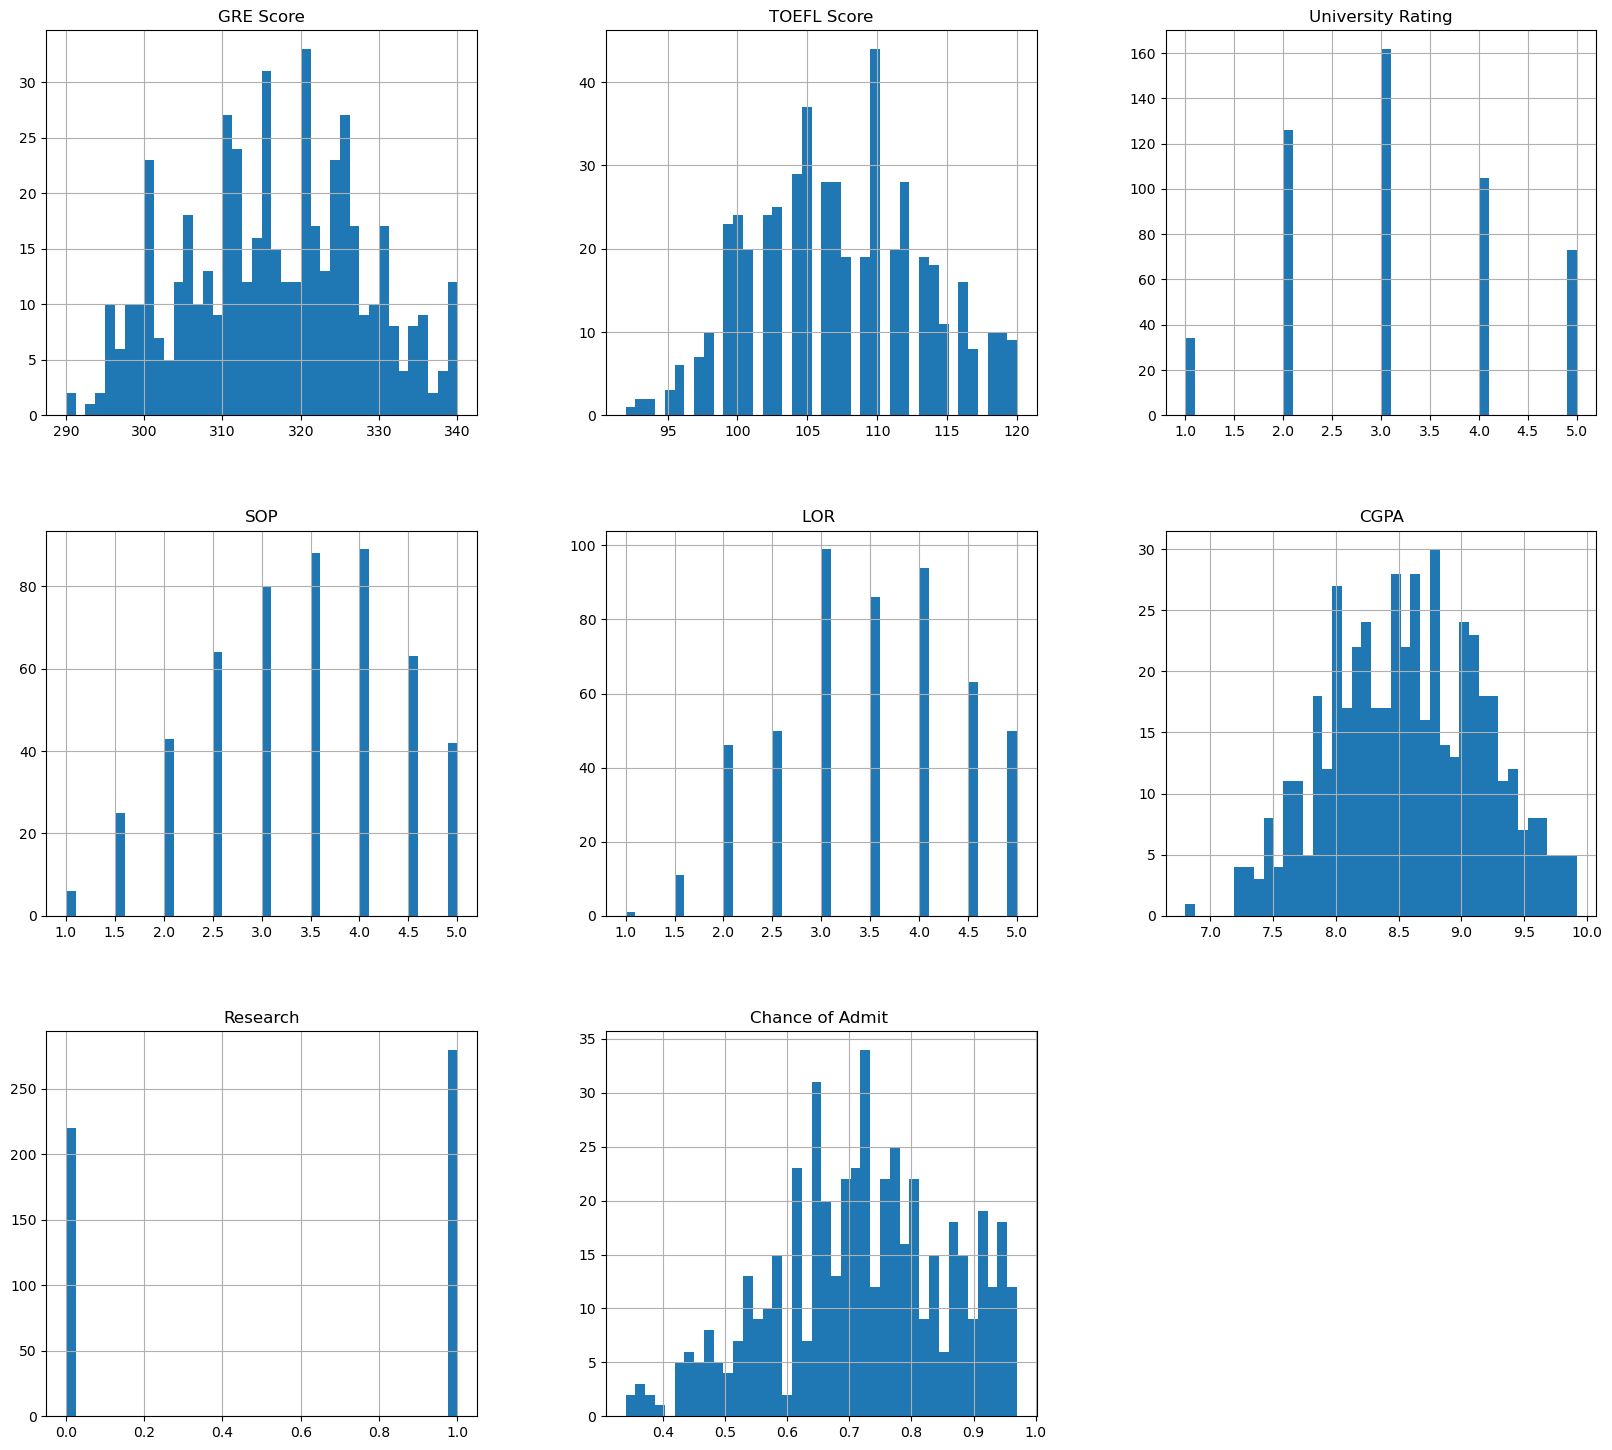

In [36]:
df.hist(bins=40, figsize=(20,18))


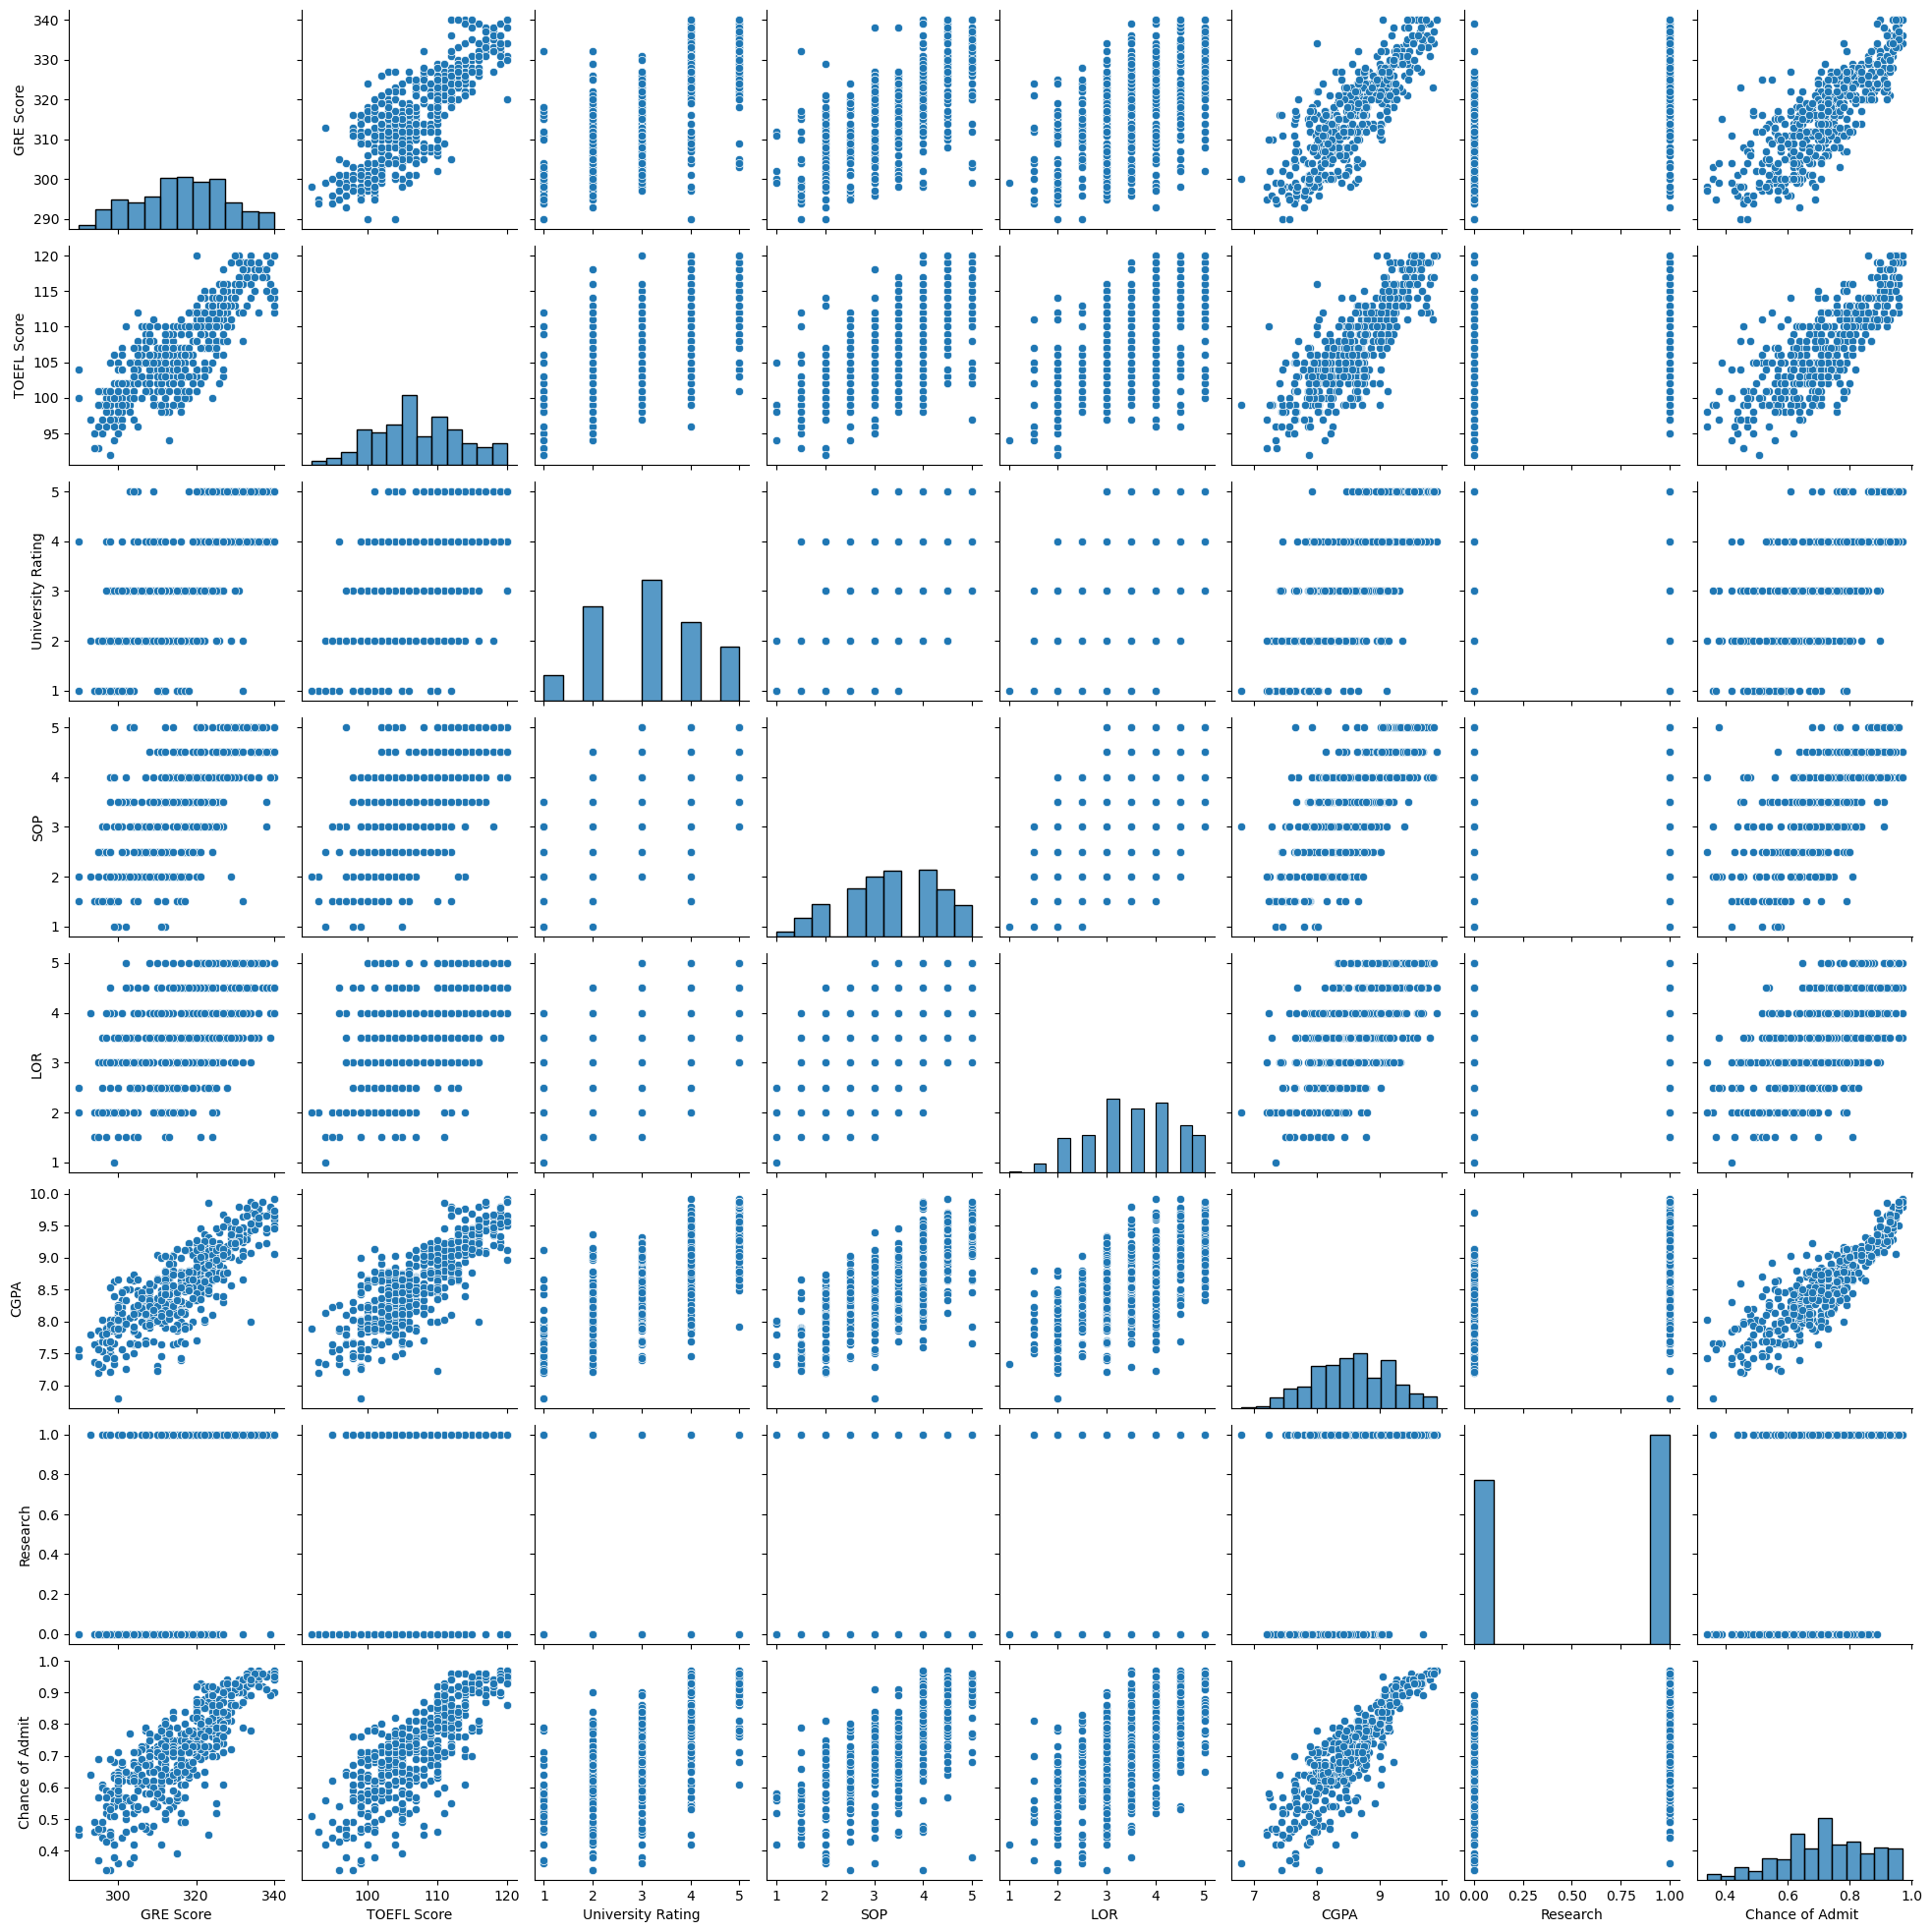

In [37]:
# Pairplot for visualizing relationships
sns.pairplot(df)
plt.show()

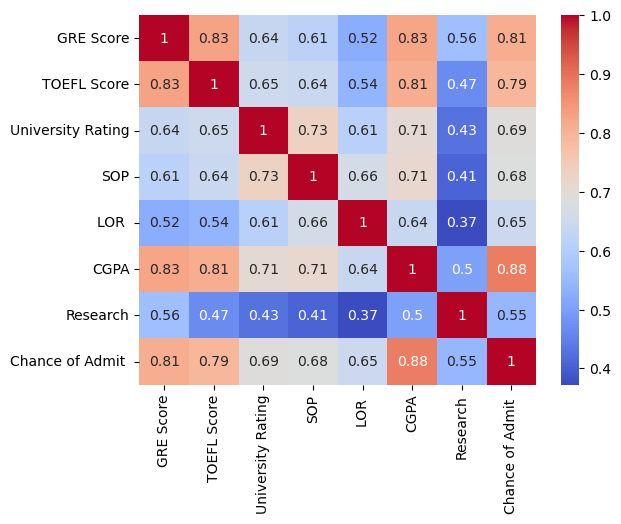

In [38]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Model building

In [39]:
df['Research'] = df['Research'].astype(int)  # Convert to integers if it's stored as boolean

# Handling missing values
df.dropna(inplace=True)  # Drop rows with missing values



In [40]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [42]:
# Separate features (X) and target (y)


# Separate features (X) and target (y)
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.0037046553987884114


# Model Evaluation

In [44]:
# Model evaluation
r2_score = model.score(X_test, y_test)
print('R-squared:', r2_score)

# Coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)


R-squared: 0.8188432567829628
Coefficients: [0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]
Intercept: -1.4214470719016457


1. An R-squared value of 0.8188 means that approximately 81.88% of the variability in the "Chance of Admit" can be explained by the independent variables included in your model. This suggests that your model is capturing a substantial portion of the variability in the target.

2. The coefficients represent the change in the target variable for a one-unit change in each respective independent variable, keeping other variables constant.
For example, a coefficient of 0.00243444 for "GRE Scores" means that, on average, a one-point increase in GRE Scores is associated with a 0.00243444 increase in the "Chance of Admit," holding other variables constant.

3. The intercept is the value of the target variable when all independent variables are zero.
In your case, it's -1.4214, which doesn't have a direct practical interpretation in this context since many of your variables don't have a meaningful "zero" value.



# Hyperparameter Tuning

Certainly, while hyperparameter tuning is more commonly associated with classification models, it's possible to perform hyperparameter tuning for regression models as well. For my regression task, I'll go through the process of hyperparameter tuning using Ridge regression as an example. Ridge regression is a variation of linear regression that includes L2 regularization.

In [45]:
# Import the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [46]:
# Define parameters to tune
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # List of alpha values to try

In [47]:
# Initialize Ridge Model and GridSearchCV:
# Create an instance of the Ridge regression model and set up the GridSearchCV with cross-validation.
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [48]:
# Perform Grid Search:
# Fit the GridSearchCV instance on your training data to search for the best hyperparameters.
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [49]:
# Get Best Parameters and Best Estimator:
# After the grid search is complete, you can access the best hyperparameters and the best trained model.
best_params = grid_search.best_params_
best_ridge_model = grid_search.best_estimator_

In [50]:
# Evaluate Best Model:
# Evaluate the best Ridge regression model using the testing dataset.
y_pred = best_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Best Ridge Model Mean Squared Error:', mse)

Best Ridge Model Mean Squared Error: 0.0037223223199539745


# Validation and Cross Validation

Absolutely, k-fold cross-validation is a crucial step in assessing the generalization performance of your model and validating its effectiveness on new, unseen data. It helps to ensure that your model's performance is consistent across different subsets of the data.

In [51]:
from sklearn.model_selection import cross_val_score, KFold

In [52]:
# Initialize Cross-Validation:
#Choose the number of folds for the cross-validation. Common values are 5 or 10, but you can adjust based on your dataset size and resources.
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [53]:
# Perform cross validation
scores = cross_val_score(ridge_model, X, y, scoring='neg_mean_squared_error', cv=kf)

In [54]:
# Calculate mean and standard deviation of scores
mean_mse = -scores.mean()
std_mse = scores.std()

In [55]:
# Print results
print(f'Mean MSE across {num_folds} folds: {mean_mse:.4f}')
print(f'Standard Deviation of MSE: {std_mse:.4f}')

Mean MSE across 5 folds: 0.0037
Standard Deviation of MSE: 0.0007
